# **HEALTH CARE EDA & MACHINE LEARNING PROJECT**

**IMPORT NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlalchemy
sqlalchemy.__version__
import sys
sys.version

'3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]'

**LOADING THE DATASET**

In [ ]:
import pandas as pd
import numpy as np
SAMPLEDATA=pd.read_csv(filepath_or_buffer="G:/IVY/data/MACHINE_LEARNING/healthcare_dataset.csv", 
                              sep=',', encoding='latin-1')
print(type(SAMPLEDATA))
pd.set_option

pd.options.display.max_columns=50
pd.options.display.max_rows=100
print('Shape before deleting duplicate values:', SAMPLEDATA.shape)

SAMPLEDATA=SAMPLEDATA.drop_duplicates()
print('Shape After deleting duplicate values:', SAMPLEDATA.shape)

SAMPLEDATA.head(10)

<class 'pandas.core.frame.DataFrame'>
Shape before deleting duplicate values: (10000, 15)
Shape After deleting duplicate values: (10000, 15)


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
5,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal
6,Charles Horton,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,161,Urgent,2021-04-15,Lipitor,Abnormal
7,Patty Norman,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,384,Elective,2019-06-02,Aspirin,Normal
8,Ryan Hayes,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,215,Elective,2020-12-22,Aspirin,Abnormal
9,Sharon Perez,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,310,Urgent,2022-12-16,Aspirin,Normal


**Myself Somnath Banerjee, I have collected a US several hospitals patient survey dataset from a particular website. This dataset contains 10,000 records, my aim is to build a EDA for report purpose & after that buIld a Unsupervised ML module to predict the "medical condition of the patients by using other variables" (Note that: if the target variable is not correlated with other variable then machine learning model can not predict)**

**DATASET BRIEF OVERVIEW**

In [ ]:
SAMPLEinfo=SAMPLEDATA.info()
SAMPLEDATA.head(10).T

In [ ]:
SAMPLEDATA.describe()

In [ ]:
SAMPLEDATA.describe(include = 'O')

In [ ]:
for date in ['Date of Admission','Discharge Date']:
    SAMPLEDATA[date] = pd.to_datetime(SAMPLEDATA[date])
#calculate the no: of days patients got admitted in hospital
SAMPLEDATA['Days Hospitalized'] = (SAMPLEDATA['Discharge Date'] - SAMPLEDATA['Date of Admission']).dt.days
SAMPLEDATA['Days Hospitalized'] = SAMPLEDATA['Days Hospitalized'].astype(int)
SAMPLEDATA['Days Hospitalized']

In [ ]:
SAMPLEDATA.head()

# Basic Data Exploration

**Removing useless columns from the data**

In [ ]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['Name','Date of Admission','Discharge Date','Room Number']
SAMPLEDATA = SAMPLEDATA.drop(UselessColumns,axis=1)
SAMPLEDATA.head(10)

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Days Hospitalized
0,81,Female,O-,Diabetes,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,Elective,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,Paul Baker,Walton LLC,Medicare,36874.896997,Emergency,Lipitor,Normal,30
3,49,Male,B-,Asthma,Brian Chandler,Garcia Ltd,Medicare,23303.322092,Urgent,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,Urgent,Paracetamol,Normal,24
5,41,Male,AB+,Arthritis,Robin Green,Boyd PLC,Aetna,22522.363385,Urgent,Aspirin,Abnormal,3
6,82,Male,AB+,Hypertension,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,Urgent,Lipitor,Abnormal,24
7,55,Female,O-,Arthritis,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,Elective,Aspirin,Normal,17
8,33,Male,A+,Diabetes,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,Elective,Aspirin,Abnormal,5
9,39,Female,O-,Asthma,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,Urgent,Aspirin,Normal,1


In [ ]:
SAMPLEDATA.describe(include='all')

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Days Hospitalized
count,10000.000000,10000,10000,10000,10000,10000,10000,10000.000000,10000,10000,10000,10000.000000
unique,NaN,2,8,6,9416,8639,5,NaN,3,5,3,NaN
top,NaN,Female,AB-,Asthma,Michael Johnson,Smith PLC,Cigna,NaN,Urgent,Penicillin,Abnormal,NaN
freq,NaN,5075,1275,1708,7,19,2040,NaN,3391,2079,3456,NaN
mean,51.452200,NaN,NaN,NaN,NaN,NaN,NaN,25516.806778,NaN,NaN,NaN,15.561800
std,19.588974,NaN,NaN,NaN,NaN,NaN,NaN,14067.292709,NaN,NaN,NaN,8.612038
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,1000.180837,NaN,NaN,NaN,1.000000
25%,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,13506.523967,NaN,NaN,NaN,8.000000
50%,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,25258.112566,NaN,NaN,NaN,16.000000
75%,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,37733.913727,NaN,NaN,NaN,23.000000


In [ ]:
print("No of null Values per Column :- ")
print(SAMPLEDATA.isnull().sum())
print("***************************************************************")
print("No of Unique Values per Column :- ")
SAMPLEDATA.nunique()

No of null Values per Column :- 
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Admission Type        0
Medication            0
Test Results          0
Days Hospitalized     0
dtype: int64
***************************************************************
No of Unique Values per Column :- 


Age                      68
Gender                    2
Blood Type                8
Medical Condition         6
Doctor                 9416
Hospital               8639
Insurance Provider        5
Billing Amount        10000
Admission Type            3
Medication                5
Test Results              3
Days Hospitalized        30
dtype: int64

In [ ]:
SAMPLEDATA.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Admission Type',
       'Medication', 'Test Results', 'Days Hospitalized'],
      dtype='object')

# Data Interpretations & visualizations

____________________________________________________________________________________________________


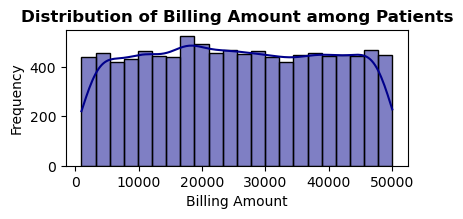

____________________________________________________________________________________________________


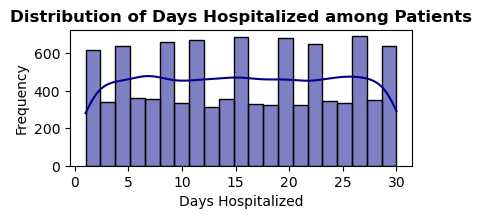

In [ ]:
#plotting histograms to find the frequency of numeric columns (age, billing amount and days hospitalized)
for col in SAMPLEDATA.columns:
    if SAMPLEDATA[col].dtype == 'int' or SAMPLEDATA[col].dtype == 'float':
        plt.figure(figsize = (15,6))
        plt.style.use('seaborn-v0_8-dark-palette')
        plt.subplot(3,3,3)
        sns.histplot(SAMPLEDATA[col],kde = True,color = 'darkblue')
        plt.ylabel('Frequency',fontsize = 10)
        plt.xlabel(col,fontsize = 10)
        plt.title(f'Distribution of {col} among Patients',fontsize = 12,weight = 'bold')
        print("_"*100)
        plt.show()

In [ ]:
#plotting pie chart and bar chart to find the data distribution for categorical columns
#using for loop for visualization of data in categorical columns
for col in SAMPLEDATA.columns:
    if SAMPLEDATA[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print('\n')
        fig,ax = plt.subplots(1,2,figsize = (18,5))
        fig.suptitle(col,fontsize = 15,weight = 'bold')
        plt.subplot(1,2,1)
        category_count = SAMPLEDATA[col].value_counts().sort_values()
        category_count.plot(kind = 'barh',color= plt.cm.Set1.colors)
        for index,value in enumerate(category_count):
            plt.text(value,index,str(value),fontsize = 16,va = 'center')
        plt.xlabel('Count')
        plt.subplot(1,2,2)
        category_count.plot(kind = 'pie',
               labels = category_count.index,
               autopct = '%1.1f%%',
               textprops = {'fontsize':16})
        plt.ylabel('')
        plt.show()
        print("_"*100)

In [ ]:
#unstack function converts the data into 2 dimensional
gender_medical = SAMPLEDATA.groupby(['Medical Condition','Gender']).size().sort_values().unstack()
gender_medical

Gender,Female,Male
Medical Condition,,
Arthritis,815,835
Asthma,874,834
Cancer,887,816
Diabetes,825,798
Hypertension,836,852
Obesity,838,790


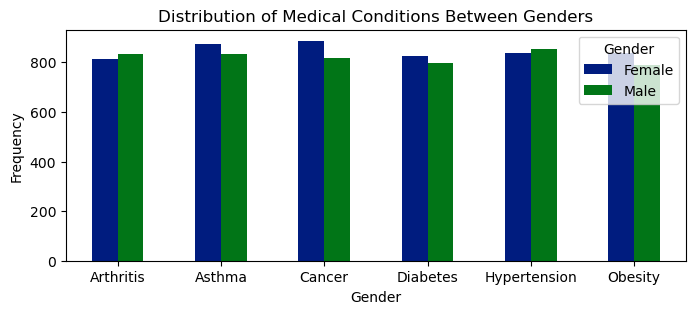

In [ ]:
gender_medical.plot(kind = 'bar',figsize = (8,3))
plt.title('Distribution of Medical Conditions Between Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
# selecting the columns to correlate
correlation_columns = ['Age', 'Gender', 'Billing Amount','Days Hospitalized']
# creating a df using the above columns
correlate_df = SAMPLEDATA[correlation_columns]
#encoding categorical columns for correlation
correlate_df['Gender'] = SAMPLEDATA['Gender'].astype('category').cat.codes
correlate_df['Admission Type'] = SAMPLEDATA['Admission Type'].astype('category').cat.codes
correlate_df['Test Results'] = SAMPLEDATA['Test Results'].astype('category').cat.codes
# creating correlation matrix
correlation_matrix = correlate_df.corr()
correlation_matrix

,Age,Gender,Billing Amount,Days Hospitalized,Admission Type,Test Results
Age,1.000000,-0.008099,-0.009483,0.009111,0.003233,0.008747
Gender,-0.008099,1.000000,0.002340,-0.006361,-0.004515,-0.010472
Billing Amount,-0.009483,0.002340,1.000000,-0.013507,0.002531,-0.005844
Days Hospitalized,0.009111,-0.006361,-0.013507,1.000000,-0.005942,-0.008228
Admission Type,0.003233,-0.004515,0.002531,-0.005942,1.000000,-0.010964
Test Results,0.008747,-0.010472,-0.005844,-0.008228,-0.010964,1.000000


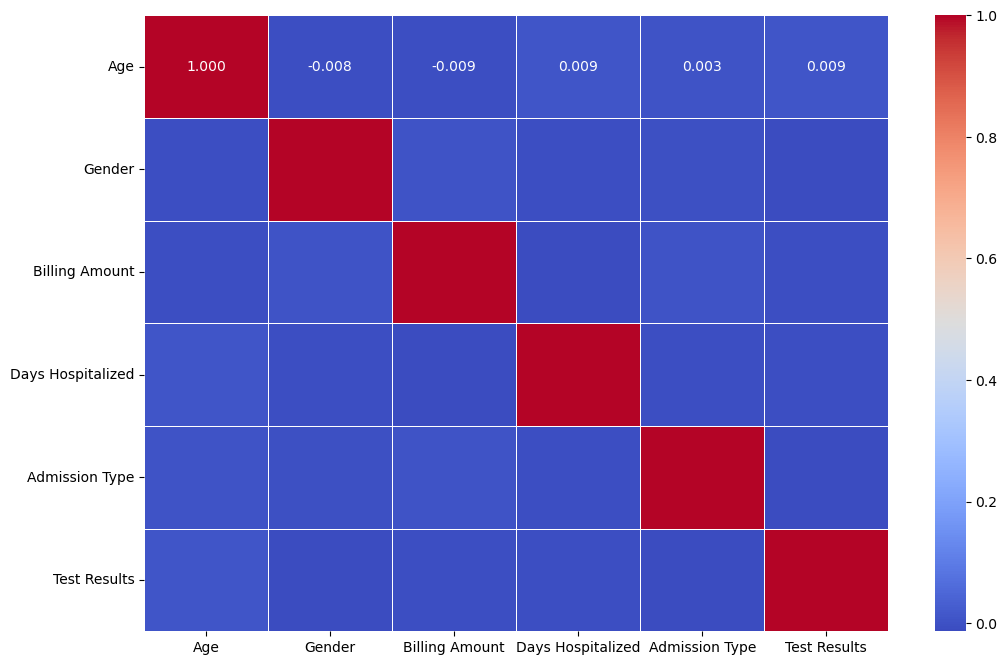

In [ ]:
#plotting correlation matrix using heatmap
plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm',fmt = '.3f',linewidths = 0.5)
plt.show()

**What is the total billing amount for top 10 hospitals?**

In [ ]:
# Grouping data by hospital and calculating the average billing amount
top10_hospital_billing = SAMPLEDATA.groupby(['Hospital'])['Billing Amount'].sum().sort_values(ascending = False)[:10].reset_index()
top10_hospital_billing

,Hospital,Billing Amount
0,Smith and Sons,477638.881124
1,Smith PLC,432283.548554
2,Smith Ltd,428163.073062
3,Smith Inc,351463.888372
4,Williams LLC,327522.472644
5,Thomas Group,327045.374505
6,Johnson Ltd,305971.192470
7,Davis and Sons,293452.520353
8,Jones Inc,290351.193848
9,Brown LLC,284695.674489


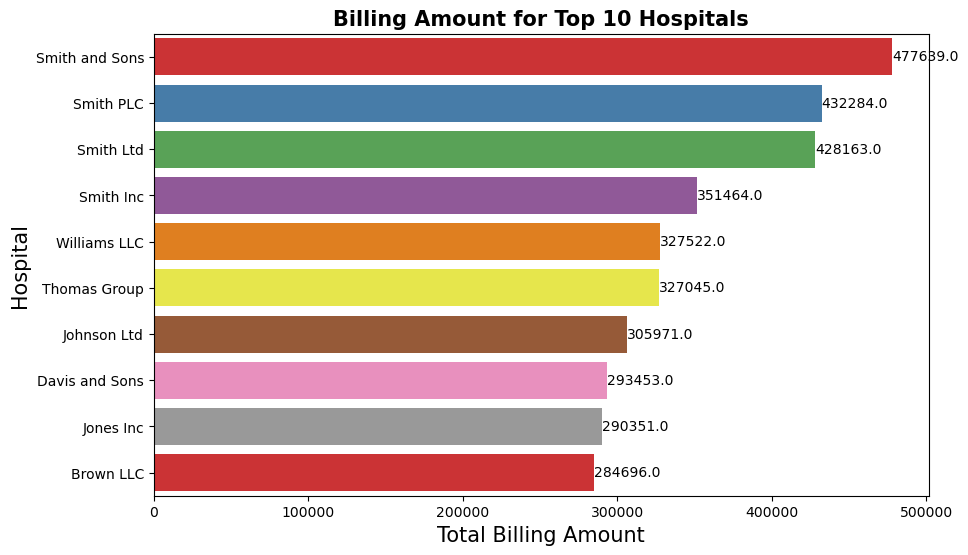

In [ ]:
# plot bar graph to find the top 10 hospitals by billing
plt.figure(figsize=(10,6))
sns.barplot(x= top10_hospital_billing['Billing Amount'],
            y= top10_hospital_billing['Hospital'],
            palette="Set1")
for index,value in enumerate(top10_hospital_billing['Billing Amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 10,va = 'center')
# Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 15)
plt.ylabel('Hospital',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Billing Amount for Top 10 Hospitals',fontsize = 15, weight = 'bold')
plt.show()

**Who are the top 10 doctors by billing amount?**

In [ ]:
# Grouping data by doctors and calculating the sum of billing amount
top20_doctors_billing = SAMPLEDATA.groupby(['Doctor'])['Billing Amount'].sum().sort_values(ascending = False)[:10].reset_index()
top20_doctors_billing

,Doctor,Billing Amount
0,Michael Johnson,181576.474893
1,Christopher Davis,159763.924755
2,Jennifer Smith,149972.685230
3,Robert Brown,147747.938399
4,Angela Jones,141867.200639
5,Robert Miller,129493.950567
6,John Jones,127864.878980
7,Leslie Jones,123228.453342
8,Jessica Johnson,122383.408771
9,Daniel Smith,121830.506139


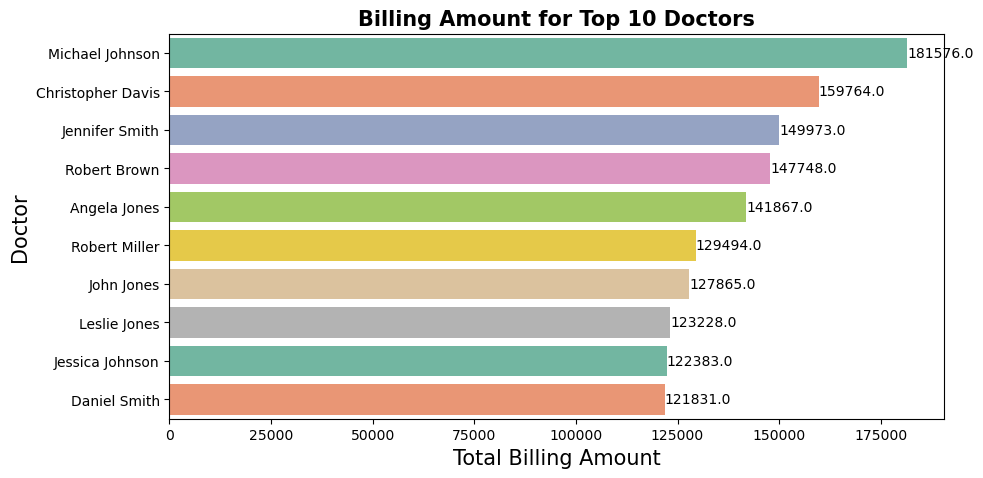

In [ ]:
# plot bar graph to find the top 10 doctors by billing
plt.figure(figsize=(10,5))
sns.barplot(x= top20_doctors_billing['Billing Amount'],
            y= top20_doctors_billing['Doctor'],
            palette="Set2")
for index,value in enumerate(top20_doctors_billing['Billing Amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 10,va = 'center')
# Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 15)
plt.ylabel('Doctor',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Billing Amount for Top 10 Doctors',fontsize = 15, weight = 'bold')
plt.show()

**Which medical condition generated the highest average billing among male and female?**

In [ ]:
# Grouping data by medical condition and gender then calculating the mean of billing amount
medical_gender_billing = SAMPLEDATA.groupby(['Medical Condition','Gender'])[['Billing Amount']].mean().reset_index()
medical_gender_billing

,Medical Condition,Gender,Billing Amount
0,Arthritis,Female,24692.417417
1,Arthritis,Male,25670.983684
2,Asthma,Female,25672.743141
3,Asthma,Male,25148.724551
4,Cancer,Female,25370.465132
5,Cancer,Male,25722.399683
6,Diabetes,Female,26369.383481
7,Diabetes,Male,25740.384845
8,Hypertension,Female,25126.230138
9,Hypertension,Male,25268.489378


**What is the distribution of different age groups?**

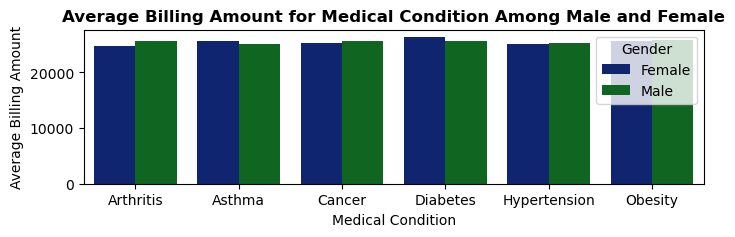

In [ ]:
# plot bar graph to find the average billing amount for medical condition among male and female
plt.figure(figsize=(8,2))
sns.barplot(x= medical_gender_billing['Medical Condition'],
            y= medical_gender_billing['Billing Amount'],
            hue = medical_gender_billing['Gender'],ci = None)
# Adding labels and title
plt.ylabel('Average Billing Amount',fontsize = 10)
plt.title('Average Billing Amount for Medical Condition Among Male and Female',fontsize = 12, weight = 'bold')
plt.show()

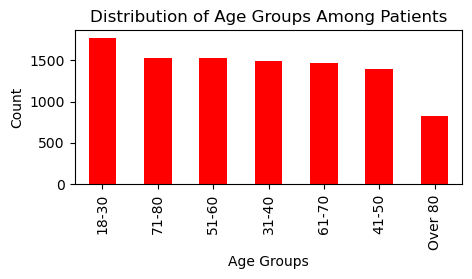

In [ ]:
SAMPLEDATA['Age_Group'] = pd.cut(SAMPLEDATA['Age'],bins = [18,30,40,50,60,70,80,float('inf')],
                                labels = ['18-30','31-40','41-50','51-60','61-70','71-80','Over 80'],
                                right = False)
Age_group = SAMPLEDATA['Age_Group'].value_counts().sort_values(ascending = False)
plt.figure(figsize=(5,2))
Age_group.plot(kind = 'bar',color='Red')
plt.title('Distribution of Age Groups Among Patients')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

In [ ]:
SAMPLEDATA.head()

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Days Hospitalized,Age_Group
0,81,Female,O-,Diabetes,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,Elective,Aspirin,Inconclusive,14,Over 80
1,35,Male,O+,Asthma,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal,14,31-40
2,61,Male,B-,Obesity,Paul Baker,Walton LLC,Medicare,36874.896997,Emergency,Lipitor,Normal,30,61-70
3,49,Male,B-,Asthma,Brian Chandler,Garcia Ltd,Medicare,23303.322092,Urgent,Penicillin,Abnormal,1,41-50
4,51,Male,O-,Arthritis,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,Urgent,Paracetamol,Normal,24,51-60


# Defining the problem statement: 
#### Create a ML model which can predict the Medical Condition
* Target Variable: 'Medical Condition'
* Predictors: 'Biling Amount'  Because among all only billing amout is corelated

In [ ]:
SAMPLEDATA.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Admission Type',
       'Medication', 'Test Results', 'Days Hospitalized', 'Age_Group'],
      dtype='object')

In [ ]:
SAMPLEDATA.nunique()

Age                      68
Gender                    2
Blood Type                8
Medical Condition         6
Doctor                 9416
Hospital               8639
Insurance Provider        5
Billing Amount        10000
Admission Type            3
Medication                5
Test Results              3
Days Hospitalized        30
Age_Group                 7
dtype: int64

In [ ]:
# Converting the nominal variable 
SAMPLEDATA['Gender'].replace({'female':0, 'male':1}, inplace=True)
SAMPLEDATA['Medical Condition'].replace({'Arthritis':0, 'Asthma':1, 'Cancer':2, 'Diabetes':3, 'Hypertension':4, 'Obesity':5}, inplace=True)
SAMPLEDATA['Insurance Provider'].replace({'Aetna':0, 'Blue Cross':1, 'Cigna':2, 'Medicare':3, 'UnitedHealthcare':4}, inplace=True)
SAMPLEDATA['Medication'].replace({'Aspirin':0, 'Paracetamol':1, 'Ibuprofen':2, 'Lipitor':3, 'Penicillin':4}, inplace=True)
SAMPLEDATA['Test Results'].replace({'Abnormal':0, 'Inconclusive':1, 'Normal':2}, inplace=True)
SAMPLEDATA['Admission Type'].replace({'Elective':0, 'Emergency':1, 'Urgent':2}, inplace=True)

In [ ]:
SAMPLEDATA.head()

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Days Hospitalized,Age_Group
0,81,Female,O-,3,Patrick Parker,Wallace-Hamilton,3,37490.983364,0,0,1,14,Over 80
1,35,Male,O+,1,Diane Jackson,"Burke, Griffin and Cooper",4,47304.064845,1,3,2,14,31-40
2,61,Male,B-,5,Paul Baker,Walton LLC,3,36874.896997,1,3,2,30,61-70
3,49,Male,B-,1,Brian Chandler,Garcia Ltd,3,23303.322092,2,4,0,1,41-50
4,51,Male,O-,0,Dustin Griffin,"Jones, Brown and Murray",4,18086.344184,2,1,2,24,51-60


# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [ ]:
SAMPLEDATA.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Admission Type',
       'Medication', 'Test Results', 'Days Hospitalized', 'Age_Group'],
      dtype='object')

<Axes: xlabel='Medical Condition'>

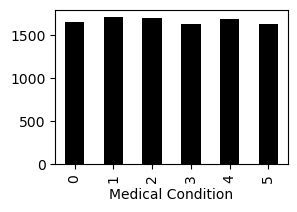

In [ ]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
GroupedData=SAMPLEDATA.groupby('Medical Condition').size()
GroupedData.plot(kind='bar', figsize=(3,2),color='black')

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [ ]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['Age','Billing Amount','Days Hospitalized']
FunctionAnova(inpData=SAMPLEDATA, TargetVariable='Admission Type', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Age is NOT correlated with Admission Type | P-Value: 0.913048108109231
Billing Amount is correlated with Admission Type | P-Value: 0.00022377043384416074
Days Hospitalized is NOT correlated with Admission Type | P-Value: 0.7771472658339462


['Billing Amount']

In [ ]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Gender', 'Blood Type', 'Insurance Provider','Medical Condition','Medication', 'Test Results']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(15,25))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "'Admission Type'"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=SAMPLEDATA[CategoricalCol], columns=SAMPLEDATA['Admission Type'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'Admission Type')

In [ ]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [ ]:
CategoricalVariables=['Gender', 'Blood Type', 'Insurance Provider','Medical Condition','Medication', 'Test Results']

# Calling the function
FunctionChisq(inpData=SAMPLEDATA, 
              TargetVariable='Admission Type',
              CategoricalVariablesList= CategoricalVariables)

Gender is NOT correlated with Admission Type | P-Value: 0.8573789880678404
Blood Type is NOT correlated with Admission Type | P-Value: 0.3900266607379393
Insurance Provider is NOT correlated with Admission Type | P-Value: 0.44396167484472815
Medical Condition is NOT correlated with Admission Type | P-Value: 0.43677367288828634
Medication is NOT correlated with Admission Type | P-Value: 0.650068671697321
Test Results is NOT correlated with Admission Type | P-Value: 0.6985261329322806


[]

In [ ]:
SelectedColumns=['Billing Amount']

# Selecting final columns
DataForML=SAMPLEDATA[SelectedColumns]
DataForML.head()

,Billing Amount
0,37490.983364
1,47304.064845
2,36874.896997
3,23303.322092
4,18086.344184


In [ ]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Admission Type']=SAMPLEDATA['Admission Type']

# Printing sample rows
DataForML_Numeric.head()

,Billing Amount,Admission Type
0,37490.983364,0
1,47304.064845,1
2,36874.896997,1
3,23303.322092,2
4,18086.344184,2


In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='Admission Type'
#Predictors=['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q','Embarked_S']

# Demonstration for deployment with final cols
Predictors=['Billing Amount']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
# Finding and storing Min and Max values for every column in X
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 1)
(7000,)
(3000, 1)
(3000,)


In [ ]:
# Inverse transform will bring back the original scale
print(PredictorScalerFit.inverse_transform(X)[0:4])

[[37490.98336353]
 [47304.06484548]
 [36874.89699661]
 [23303.3220922 ]]


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=5,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       981
           1       0.37      0.51      0.43      1008
           2       0.35      0.55      0.43      1011

    accuracy                           0.36      3000
   macro avg       0.24      0.35      0.29      3000
weighted avg       0.24      0.36      0.29      3000

[[  0 440 541]
 [  0 517 491]
 [  0 454 557]]
Accuracy of the model on Testing Sample Data: 0.29

Accuracy values for 10-fold Cross Validation:
 [0.27649775 0.27494125 0.28227038 0.28281096 0.29042022 0.29680855
 0.29525582 0.29017552 0.28717447 0.27153493]

Final Average Accuracy of the model: 0.28


In [ ]:
F1_Score

0.28801452316596177

DecisionTreeClassifier(criterion='entropy', max_depth=3)
              precision    recall  f1-score   support

           0       0.27      0.00      0.01       981
           1       0.36      0.47      0.41      1008
           2       0.35      0.58      0.44      1011

    accuracy                           0.36      3000
   macro avg       0.33      0.35      0.28      3000
weighted avg       0.33      0.36      0.29      3000

[[  3 414 564]
 [  5 472 531]
 [  3 417 591]]
Accuracy of the model on Testing Sample Data: 0.29

Accuracy values for 10-fold Cross Validation:
 [0.25321016 0.26188725 0.25672619 0.26659244 0.25935998 0.26657129
 0.28894215 0.25718075 0.28693242 0.23807312]

Final Average Accuracy of the model: 0.26


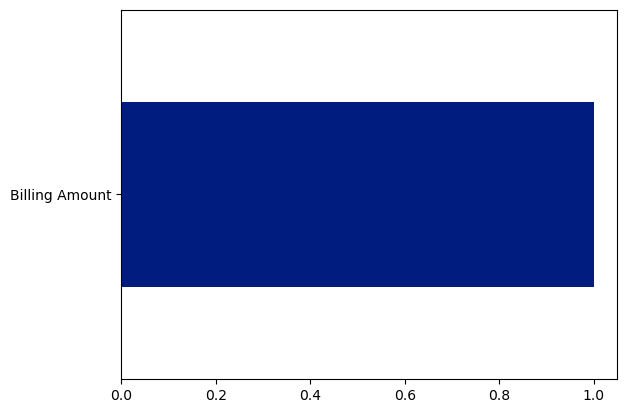

In [ ]:
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# This is a unsupervised ML Project, this code is developed by Somnath Banerjee, GMail ID: somnathbanerjee342000@gmail.com